Task 3 - Data Cleaning and Insight Generation from Survey Data

In [1]:
import pandas as pd
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kaggle_survey_answer = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\kaggle_survey_answer_2017_2022.csv")
kaggle_survey_choice = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\kaggle_survey_choice_2017_2022.csv")
kaggle_survey_question = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\kaggle_survey_question_2017_2022.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11368\2716188385.py:1: DtypeWarning: Columns (0: Unnamed: 0) have mixed types. Specify dtype option on import or set low_memory=False.
  kaggle_survey_answer = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\kaggle_survey_answer_2017_2022.csv")


In [9]:
kaggle_survey_question.info()

<class 'pandas.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        442 non-null    int64
 1   question_id       442 non-null    str  
 2   survey_year       442 non-null    int64
 3   question_number   442 non-null    int64
 4   question_content  442 non-null    str  
dtypes: int64(3), str(2)
memory usage: 17.4 KB


In [8]:
kaggle_survey_answer.info()

<class 'pandas.DataFrame'>
RangeIndex: 6405575 entries, 0 to 6405574
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         object 
 1   year               float64
 2   anwser_id          str    
 3   answer_time_spent  float64
 4   question_number    float64
 5   choice_content     str    
dtypes: float64(3), object(1), str(2)
memory usage: 293.2+ MB


In [ ]:
kaggle_survey_choice.info()

<class 'pandas.DataFrame'>
RangeIndex: 50652 entries, 0 to 50651
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      50652 non-null  int64
 1   question_id     50652 non-null  str  
 2   choice_id       50652 non-null  str  
 3   choice_num      50652 non-null  int64
 4   choice_content  50556 non-null  str  
dtypes: int64(2), str(3)
memory usage: 1.9 MB


In [11]:
kaggle_survey_answer.describe()

,year,answer_time_spent,question_number
count,6.405522e+06,5.372256e+06,6.405522e+06
mean,2.019342e+03,1.125246e+04,3.359859e+01
std,1.700930e+00,7.787352e+04,4.346511e+01
min,2.017000e+03,1.600000e+01,1.000000e+00
25%,2.018000e+03,5.040000e+02,1.200000e+01
50%,2.019000e+03,7.900000e+02,2.100000e+01
75%,2.021000e+03,1.361000e+03,3.600000e+01
max,2.022000e+03,2.533678e+06,2.280000e+02


In [13]:
kaggle_survey_answer.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
kaggle_survey_choice.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
kaggle_survey_question.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [14]:
kaggle_survey_answer.isnull().sum()

year                      53
anwser_id                 53
answer_time_spent    1033319
question_number           53
choice_content        212808
dtype: int64

In [21]:
kaggle_survey_answer[kaggle_survey_answer['year'].isna() & kaggle_survey_answer['anwser_id'].isna() & kaggle_survey_answer['question_number'].isna()].shape

(53, 5)

In [22]:
kaggle_survey_answer = kaggle_survey_answer.dropna(subset=['year','question_number','anwser_id'])

In [26]:
kaggle_survey_answer['answer_time_spent'] = (
    kaggle_survey_answer
    .groupby('question_number')['answer_time_spent']
    .transform(lambda x: x.fillna(x.mean()))
)

In [37]:
kaggle_survey_answer['answer_time_spent'] = kaggle_survey_answer['answer_time_spent'].fillna(kaggle_survey_answer['answer_time_spent'].mean())

In [41]:
kaggle_survey_answer['year'] = kaggle_survey_answer['year'].astype('int')
kaggle_survey_answer['question_number'] = kaggle_survey_answer['question_number'].astype(int)

In [42]:
kaggle_survey_answer = kaggle_survey_answer.drop_duplicates()

In [44]:
all_info = kaggle_survey_answer.merge(
    kaggle_survey_question,
    left_on=['question_number','year'],
    right_on=['question_number','survey_year'],
    how='left'
)

In [48]:
programming_df = all_info[all_info['question_content'].str.contains('programming', case=False, na=False)]
programming_df

,year,anwser_id,answer_time_spent,question_number,choice_content,question_id,survey_year,question_content
265538,2022,2022A000002,462.000000,11,1-3 years,2022Q11,2022,For how many years have you been writing code ...
265539,2022,2022A000003,293.000000,11,1-3 years,2022Q11,2022,For how many years have you been writing code ...
265540,2022,2022A000004,851.000000,11,10-20 years,2022Q11,2022,For how many years have you been writing code ...
265541,2022,2022A000005,232.000000,11,5-10 years,2022Q11,2022,For how many years have you been writing code ...
265542,2022,2022A000006,277.000000,11,1-3 years,2022Q11,2022,For how many years have you been writing code ...
...,...,...,...,...,...,...,...,...
5288398,2017,2017A016665,10652.654702,15,Dataset aggregator/platform (i.e. Socrata/Kagg...,2017Q15,2017,What programming language would you recommend ...
5288399,2017,2017A016682,10652.654702,15,Dataset aggregator/platform (i.e. Socrata/Kagg...,2017Q15,2017,What programming language would you recommend ...
5288400,2017,2017A016688,10652.654702,15,Dataset aggregator/platform (i.e. Socrata/Kagg...,2017Q15,2017,What programming language would you recommend ...
5288401,2017,2017A016705,10652.654702,15,Dataset aggregator/platform (i.e. Socrata/Kagg...,2017Q15,2017,What programming language would you recommend ...


In [74]:
remove_values = ['< 1 years','1-3 years','3-5 years']
kaggle_survey_answer['year'] = kaggle_survey_answer['year'].astype(int)

programming_df = programming_df[
    ~programming_df['choice_content'].isin(remove_values)
]

top_langs = (
    programming_df['choice_content']
    .value_counts()
    .head(10)
    .reset_index(name='count')
)

top_langs

,choice_content,count
0,Python,152726
1,SQL,47839
2,R,33890
3,Java,19864
4,C++,17467
5,C,14391
6,Javascript,13330
7,MATLAB,12944
8,Bash,10569
9,Other,8562


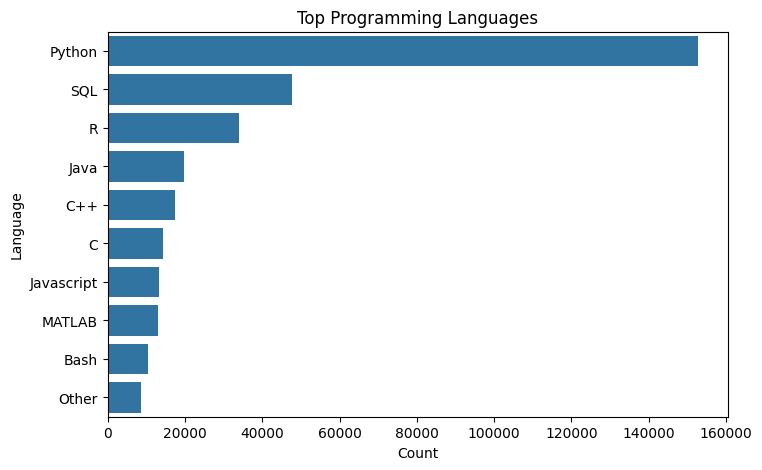

In [75]:
top_langs = programming_df['choice_content'].value_counts().head(10)

top_langs_df = top_langs.reset_index()
top_langs_df.columns = ['Language', 'Count']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=top_langs_df, x='Count', y='Language')
plt.title("Top Programming Languages")
plt.show()

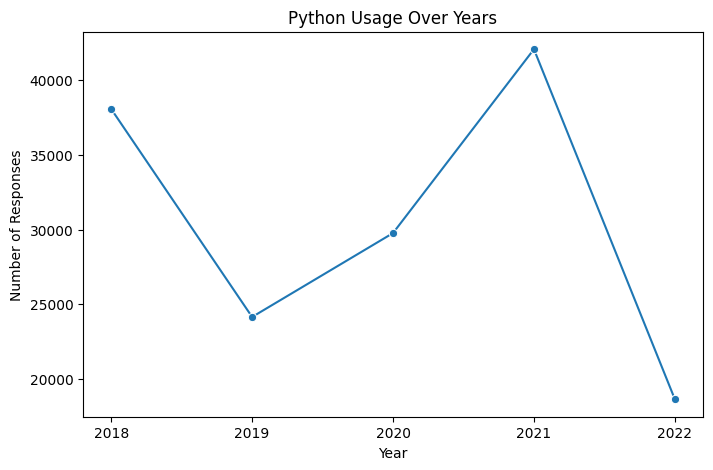

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

python_df = programming_df[
    programming_df['choice_content'].str.contains('Python', na=False)
]

trend = python_df.groupby('year').size()

x_vals = trend.index.astype(int)
y_vals = trend.values

plt.figure(figsize=(8,5))
sns.lineplot(x=x_vals, y=y_vals, marker='o')
plt.title("Python Usage Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Responses")
plt.xticks(x_vals)
plt.show()